## Class 2: Hands-On Regression

### August Review
Tobias Rodriguez del Pozo, Fall 2025

### Class 2: Hands-On Regression

#### Outline for Today

1. Review of last week
2. Inference
3. Diagnostics

### Inference and Goodness of Fit

Recall from last time that:

$$
y = \beta x  + \epsilon
$$

Most tools that we have focus heavily on analyzing the $\epsilon$ term.

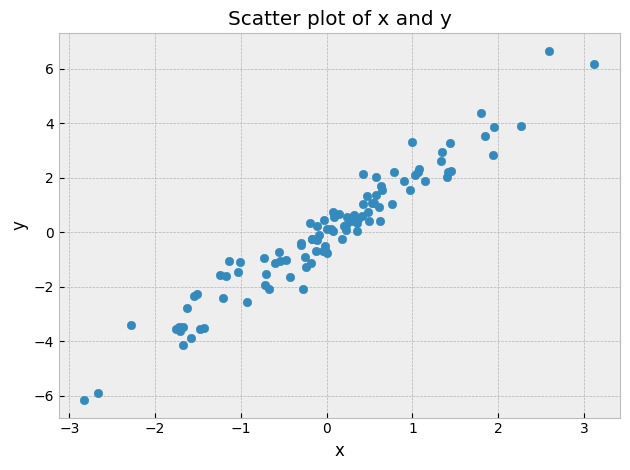

In [ ]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

plt.style.use('bmh')

x = np.random.normal(loc=0, scale=1, size=100)
y = 2 * x + np.random.normal(loc=0, scale=0.5, size=100)

plt.scatter(x, y, zorder=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of x and y')
plt.tight_layout()

In [3]:
# Fit a linear regression model
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.937
Model:                            OLS   Adj. R-squared (uncentered):              0.936
Method:                 Least Squares   F-statistic:                              1461.
Date:                Sun, 17 Aug 2025   Prob (F-statistic):                    4.41e-61
Time:                        14:49:09   Log-Likelihood:                         -86.457
No. Observations:                 100   AIC:                                      174.9
Df Residuals:                      99   BIC:                                      177.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.9937      0.052     38.220      0.000       1.890       2.097
==============================================================================
Omnibus:                        2.403   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.301   Jarque-Bera (JB):                2.196
Skew:                           0.362   Prob(JB):                        0.333
Kurtosis:                       2.953   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The `statsmodels` package in Python gives us many ways to fit linear models, and the summary of the model gives us a lot of information about the fit.

### $r^2$

The $r^2$ is a measure of how well the model fits the data. It is defined as:
$$r^2 = 1 - \frac{\text{SS}_{\text{res}}}{\text{SS}_{\text{tot}}}$$

Where $\text{SS}_{\text{res}}$ is the sum of squared residuals and $\text{SS}_{\text{tot}}$ is the total sum of squares.

Sum of squared residuals is defined as:
$$\text{SS}_{\text{res}} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$
(does this look familiar?)

And the total sum of squares is defined as:
$$\text{SS}_{\text{tot}} = \sum_{i=1}^{n} (y_i - \bar{y})^2$$
(does this look familiar?)

Therefore, we can write:
$$r^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$$

Note that the denominator here is the variance of $y$, and the numerator is the variance of the residuals (error). So $r^2$ is the ratio of the variance of the residuals to the variance of $y$ -- ie. how much of the variance in $y$ is explained by the model.

To get some better intuition, lets think about two extreme cases:
1. The model is a *perfect* fit to the data.
2. The model is a *terrible* fit to the data.

In case 1, the residuals are zero, so $\text{SS}_{\text{res}} = 0$. Therefore:
$$r^2 = 1 - \frac{0}{\text{SS}_{\text{tot}}} = 1$$

In case 2, the model is a terrible fit to the data, meaning that the predicted values are very far from the actual data points. In this case, the residuals are large, so $\text{SS}_{\text{res}}$ is large. Therefore:
$$r^2 = 1 - \frac{\text{SS}_{\text{res}}}{\text{SS}_{\text{tot}}} \approx 0$$

You might have noticed something here. What happens if the model is just the mean of $y$? In this case, the predicted values are all equal to the mean, so the residuals are just the difference between the actual values and the mean. Therefore:
$$\text{SS}_{\text{res}} = \text{SS}_{\text{tot}}$$
And so:
$$r^2 = 1 - \frac{\text{SS}_{\text{tot}}}{\text{SS}_{\text{tot}}} = 0$$

So *really* what $r^2$ is telling us is how much better the model is than just using the mean of $y$ as the prediction.

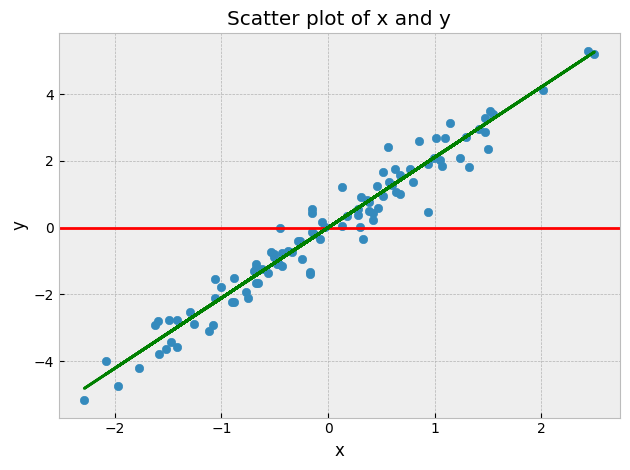

In [4]:
x = np.random.normal(loc=0, scale=1, size=100)
y = 2 * x + np.random.normal(loc=0, scale=0.5, size=100)

plt.scatter(x, y, zorder=2)

plt.axhline(0, color='red', lw=2, zorder=2, label='y=y_mean')

model = sm.OLS(y, x).fit()
plt.plot(x, model.predict(), color='green', lw=2, zorder=3, label='y=2x')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of x and y')
plt.tight_layout()
plt.show()

Question: Can in-sample $r^2$ be negative?

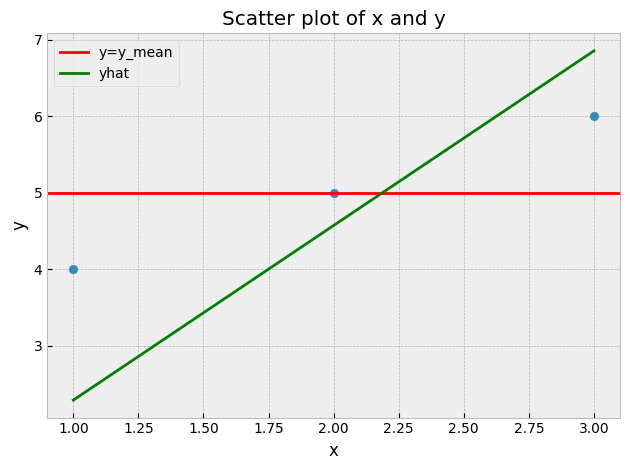

R-squared: -0.9285714285714286
Statsmodels R-squared: 0.9499072356215214


In [5]:
# Make y be -2x + noise
x = np.array([1, 2, 3])
y = np.array([4, 5, 6])

plt.scatter(x, y, zorder=2)
plt.axhline(y.mean(), color='red', lw=2, zorder=2, label='y=y_mean')

# Fit a linear regression model
model = sm.OLS(y, x).fit()

plt.plot(x, model.predict(), color='green', lw=2, zorder=3, label='yhat')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of x and y')
plt.legend()
plt.tight_layout()
plt.show()

# Calculate R-squared
r_squared = 1 - (np.sum(model.resid ** 2) / np.sum((y - np.mean(y)) ** 2))
print(f'R-squared: {r_squared}')
print(f'Statsmodels R-squared: {model.rsquared}')

What is going on here?!?! We followed the formula but `statsmodels` is giving us a positive $r^2$ value, even though the $r^2$ should be negative.

Well, the answer is that `statsmodels` uses something called the *uncentered $r^2$*, which means that when we don't include a constant in the model, it instead does:

$$
r^2 = 1 - \frac{\sum_{i=1}^n (y_i - \hat{y}_i)^2 }{\sum_{i=1}^n y_i^2}
$$

What is this telling us? That the comparison now (so benchmark $r^2 = 0$) is a *horizontal line* at $y=0$ instead of the mean of $y$. So this is actually very subtle, we've just changed the benchmark for the $r^2$ calculation. Meaning that our model performs *better* than a horizontal line at $y=0$, but much worse than a horizontal line at the mean of $y$.

Question: How can we demean $y$?

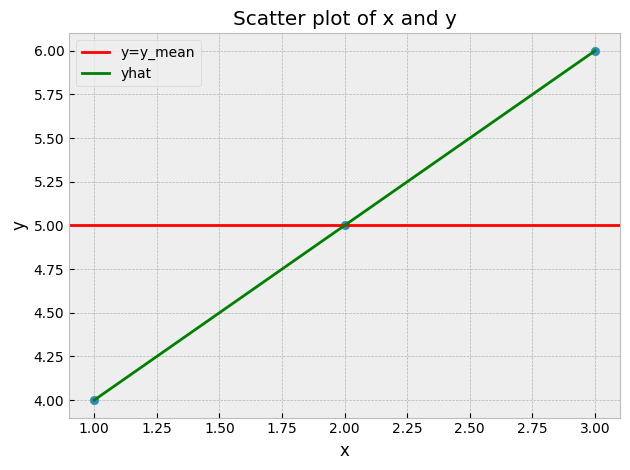

R-squared: 1.0
Statsmodels R-squared: 1.0


In [31]:
# Make y be -2x + noise
x = np.array([1, 2, 3])
y = np.array([4, 5, 6])

plt.scatter(x, y, zorder=2)
plt.axhline(y.mean(), color='red', lw=2, zorder=2, label='y=y_mean')

# Fit a linear regression model
model = sm.OLS(y, sm.add_constant(x)).fit()

plt.plot(x, model.predict(), color='green', lw=2, zorder=3, label='yhat')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of x and y')
plt.legend()
plt.tight_layout()
plt.show()

# Calculate R-squared
r_squared = 1 - (np.sum(model.resid ** 2) / np.sum((y - np.mean(y)) ** 2))
print(f'R-squared: {r_squared}')
print(f'Statsmodels R-squared: {model.rsquared}')

Phew! Okay, so now we know that we should probably look at the centered and uncentered $r^2$ values. What does it mean to have a negative $r^2$? It means that our model is probably *misspecified* in some way.

### The F-statistic

Great, we have an $r^2$ value. However, let's look at what the typical finance $r^2$ looks like*.

*This is a predictive $r^2$, contemporaneous $r^2$ might be a lot higher.

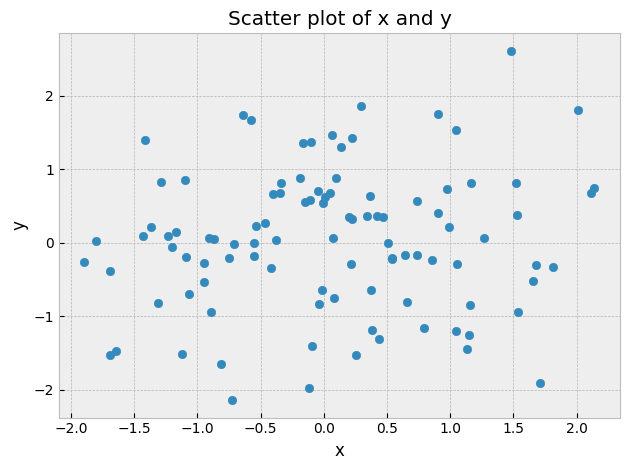

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.255
Date:                Sun, 17 Aug 2025   Prob (F-statistic):              0.265
Time:                        16:30:01   Log-Likelihood:                -136.85
No. Observations:                 100   AIC:                             277.7
Df Residuals:                      98   BIC:                             282.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0336      0.096      0.350      0.727      -0.157       0.225
x1             0.1098      0.098      1.120      0.265      -0.085       0.304
==============================================================================
Omnibus:                        0.290   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.865   Jarque-Bera (JB):                0.464
Skew:                          -0.065   Prob(JB):                        0.793
Kurtosis:                       2.692   Cond. No.                         1.06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
x = np.random.normal(loc=0, scale=1, size=100)
y = np.random.normal(loc=0, scale=1, size=100) + 0.1 * x

plt.scatter(x, y, zorder=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of x and y')
plt.tight_layout()
plt.show()

# Fit a linear regression model
model = sm.OLS(y, sm.add_constant(x)).fit()
model.summary()

This is terrible! We have an $r^2$ of ~0.014. This means that our model explains only 1.4% of the variance in the data. If anything, this is a little high, for context from "Quantitative Portfolio Management" by Isichenko, a 1-day equity prediction model might have an $r^2$ of 0.0001.

Therefore, instead of looking at the absolute value of $r^2$ (although higher is always better), we should look at the *relative* value of $r^2$ compared to the benchmark of 0. This is where the F-statistic comes in.

The F-statistic is an *overall* measure of significance of the model. That is, it tells us whether or not the model as a whole is significant (compared to an individual beta). It is defined as:
$$
F = \frac{\text{Explained Variance}}{\text{Unexplained Variance}} = \frac{MSR}{MSE}
$$
Where $MSR$ (Mean Square Regression) is:

$$MSR = \frac{\text{SS}_{\text{reg}}}{p} = \frac{\sum_{i=1}^{n} (\hat{y}_i - \bar{y})^2}{p}$$
Where $p$ is the number of parameters in the model (including the intercept).

The $MSE$ (Mean Square Error) is:
$$MSE = \frac{\text{SS}_{\text{res}}}{n - p - 1} = \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{n - p - 1}$$
Where $n$ is the number of observations.

Mean squared error is kind of intuitive, it's basically your average error *penalized* by the number of parameters in the model. 

MSR is not as intuitive, but we can think of it as the variance of our predictions, ie. how much our predictions vary from the mean of $y$. 

My preferred way of thinking about it getting it in terms of $r^2$:

\begin{align*}
F &= \frac{MSR}{MSE} \\
&= \frac{\frac{\text{SSR}}{p}}{\frac{\text{SSE}}{n - p - 1}} \\
&= \frac{\text{SSR}}{\text{SSE}} \cdot \frac{n - p - 1}{p} \\
&= \frac{R^2 \cdot \text{SST}}{(1 - R^2) \cdot \text{SST}} \cdot \frac{n - p - 1}{p} \\
&= \frac{R^2}{1 - R^2} \cdot \frac{n - p - 1}{p}
\end{align*}

This is made possible by the fact that $\text{SS}_{\text{tot}} = \text{SS}_{\text{reg}} + \text{SS}_{\text{res}}$.

Okay, so what does this mean?

Well, it first means that if we throw in a ton of parameters, the $F$-statistic will go down, ie. if I have 100 data points and 99 parameters, then:
$$
\frac{(n - p - 1)}{p} = \frac{(100 - 99 - 1)}{99} = \frac{0}{99} = 0
$$
Compared to 2 parameters:
$$
\frac{(n - p - 1)}{p} = \frac{(100 - 2 - 1)}{2} = \frac{97}{2} = 48.5
$$

Second, it means that if we have a high $r^2$, then the $F$-statistic will be high, ie. if we have a model that explains a lot of the variance in the data, then the $F$-statistic will be high. Suppose we have a model with an $r^2$ of 0.9, then:
$$
F = \frac{0.9}{1 - 0.9} = \frac{0.9}{0.1} = 9
$$
And if we have a model with an $r^2$ of 0.1, then:
$$
F = \frac{0.1}{1 - 0.1} = \frac{0.1}{0.9} \approx 0.111
$$

Great, so we now have a way to measure the overall significance of the model. But how do we know if the $F$-statistic is "high" or "low"? 

Well, this is the same as a $z$-score or $t$-statistic, we can use the $F$-distribution to determine the p-value of the $F$-statistic. Thus, the null hypotheses are drawn from an $F$-distribution with $p$ and $n - p - 1$ degrees of freedom.

Where, our null hypothesis can be stated in two ways:
1. $H_0: r^2 = 0$
2. $H_0: \beta_1 = \beta_2 = \dots = 0$

Thus, we should expect significance if *either* our $r^2$ is statistically different from 0, *or* at least one of our betas is statistically different from 0.

#### Significance Tests

Suppose we have some data, and we want to see if a new data point is an outlier. We can use a $z$-test to determine if the new data point is significantly different from the mean of the data.

$$
z = \frac{x - \mu}{\sigma}
$$

Intuitively, what are we doing here? We're "normalizing" the data point by subtracting the mean and dividing by the standard deviation. This gives us a measure of how many standard deviations the data point is from the mean.

And, if the data is normally distributed, then we can use the properties of the normal distribution to determine the p-value of the $z$-score.

$$
p = 2 \cdot (1 - \Phi(|z|))
$$

The two just comes from the fact that we're interested in whether or not the data point is significantly different from the mean, in either direction (if we only cared about one direction, we would just use 1).

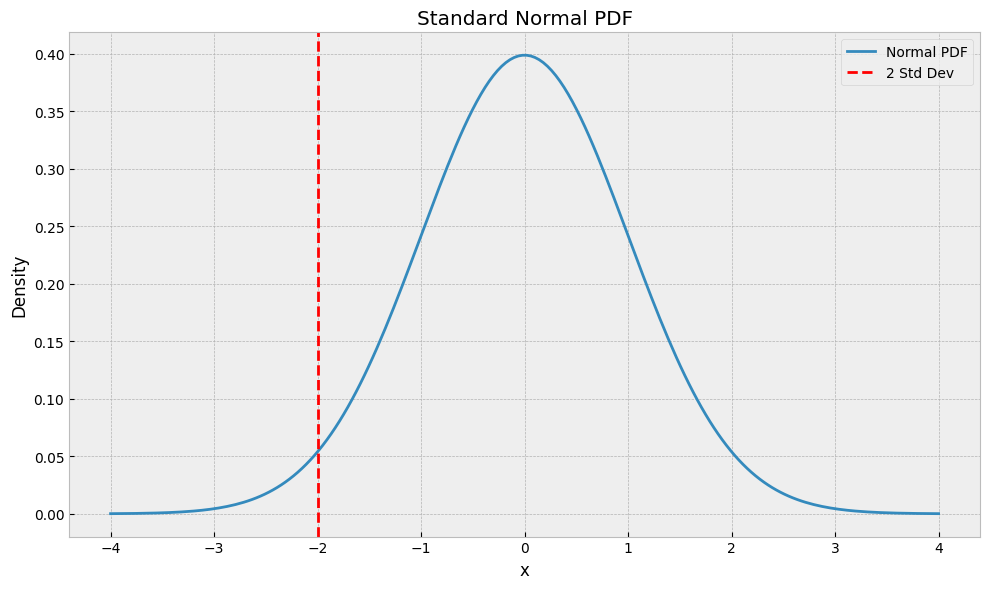

CDF at x=-2 (2 standard deviations): 0.0228


In [ ]:
from scipy.stats import norm

# Plot the normal PDF
x_vals = np.linspace(-4, 4, 200)
pdf_vals = norm.pdf(x_vals)
plt.figure(figsize=(10, 6))
plt.plot(x_vals, pdf_vals, label='Normal PDF')
plt.axvline(-2, color='red', linestyle='--', label='2 Std Dev')
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Standard Normal PDF')
plt.legend()
plt.tight_layout()
plt.show()

# Show the CDF at x=-2
cdf_at_neg_2 = norm.cdf(-2)

print(f"CDF at x=-2 (2 standard deviations): {cdf_at_neg_2:.4f}")

Okay, so how does this relate to the F-statistic? Well, the F-distribution describes the ratio of two independent variances (chi-squared distributions), ie. are these two variances significantly different from each other?

So, if we *assume* that our errors, $\epsilon$ are independent from our predicted values, $\hat{y}$, then we can use the F-distribution to determine the p-value of the F-statistic.

Thus, returning to the definition of the F-statistic:
$$
F = \frac{MSR}{MSE}
$$

And we can use the CDF of the F-distribution to determine the p-value:

In [ ]:
import scipy.stats as stats

mse = np.sum(model.resid ** 2) / model.df_resid
msr = (np.sum((model.fittedvalues - np.mean(y)) ** 2)) / model.df_model

f_statistic = msr / mse

# Calculate p-value from F-statistic
p_value = 1 - stats.f.cdf(f_statistic, model.df_model, model.df_resid)
print(f"F-statistic: {f_statistic}")
print(f"p-value: {p_value}")

F-statistic: 1.4236937506580267
p-value: 0.23567705710493447


This leads us nicely to the next two assumptions of the linear regression model:
1. The errors, $\epsilon$, are independent of the predicted values, $\hat{y}$.
2. The errors, $\epsilon$, are normally distributed.

The whole chain of reasoning here is that:
1. $\epsilon$ are i.i.d.
2. Therefore, $y - \beta X$ is normally distributed. Additionally, $\hat{y} | X$ is normally distributed.
3. The sum of squared normal distributions is chi-squared distributed.
4. So, the ratio of two chi-squared distributions is F-distributed.

I want to emphasize here that we are not making any assumptions about the distribution of $y$ or $X$, we are only making assumptions about the distribution of the errors, $\epsilon$ -- and this induces a normal distribution on $y | X$, and $\hat{y} | X$.

We're going to spend some time later talking about when these assumptions are violated, but for now, let's continue under the assumption that they hold.

### T-statistic

So, we have an overall measure of significance for the model, but what about the individual parameters? How do we know if a particular beta is significant?

In [24]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.424
Date:                Sun, 17 Aug 2025   Prob (F-statistic):              0.236
Time:                        15:55:12   Log-Likelihood:                -132.08
No. Observations:                 100   AIC:                             268.2
Df Residuals:                      98   BIC:                             273.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0026      0.092      0.028      0.977      -0.180       0.185
x1             0.1128      0.095      1.193      0.236      -0.075       0.300
==============================================================================
Omnibus:                        1.970   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.374   Jarque-Bera (JB):                1.439
Skew:                           0.046   Prob(JB):                        0.487
Kurtosis:                       2.420   Cond. No.                         1.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

So, just like how our null hypothesis for the F-statistic was that our $r^2 = 0$, our null hypothesis for the t-statistic is that a particular beta is equal to 0: 
$$
H_0: \beta_j = 0
$$

\begin{align*}
\hat{\beta} &= (X^TX)^{-1}X^Ty \\
&= (X^TX)^{-1}X^T(X\beta + \epsilon) \\
&= (X^TX)^{-1}X^TX\beta + (X^TX)^{-1}X^T\epsilon \\
&= I\beta + (X^TX)^{-1}X^T\epsilon \\
\hat{\beta} &= \beta + (X^TX)^{-1}X^T\epsilon
\end{align*}

So note that the only component of randomness in $\hat{\beta}$ is the $(X^TX)^{-1}X^T\epsilon$ term. More specifically, the $\epsilon$ term. So, if we can determine the distribution of $\epsilon$, we can determine the distribution of $\hat{\beta} | X$.

We can go through and derive the expectation and variance of $\hat{\beta}$, but I'm going to skip that for now.

$$
E[\hat{\beta} | X] = \beta
$$
$$
Var(\hat{\beta} | X) = \sigma^2 (X^TX)^{-1}
$$
Where $\sigma^2$ is the variance of the errors, $\epsilon$.

If this holds, then we can say that $\hat{\beta}$ is normally distributed:

$$
\hat{\beta} | X \sim N(\beta, \sigma^2 (X^TX)^{-1})
$$

And because we only have sample data (and therefore sample variance), we need to do a t-test on the betas:
$$
SE(\hat{\beta}_j) = s\sqrt{C_{jj}}
$$
$$
t = \frac{\hat{\beta}_j - \beta_j}{SE(\hat{\beta}_j)}
$$
$$
t = \frac{\hat{\beta}_j}{SE(\hat{\beta}_j)}
$$

Where $C_{jj}$ is the $j$ th diagonal element of $(X^TX)^{-1}$, and $s$ is the sample standard deviation of the residuals.

And then we can use the CDF of the t-distribution to determine the p-value:
$$
p = 2 \cdot (1 - T(|t|))
$$
Where the t-distribution is defined as:
$$
f(t) = \frac{\Gamma(\frac{\nu+1}{2})}{\sqrt{\nu\pi} \, \Gamma(\frac{\nu}{2})} \left(1 + \frac{t^2}{\nu}\right)^{-\frac{\nu+1}{2}}
$$
Where $\nu = n - p - 1$ is the degrees of freedom.


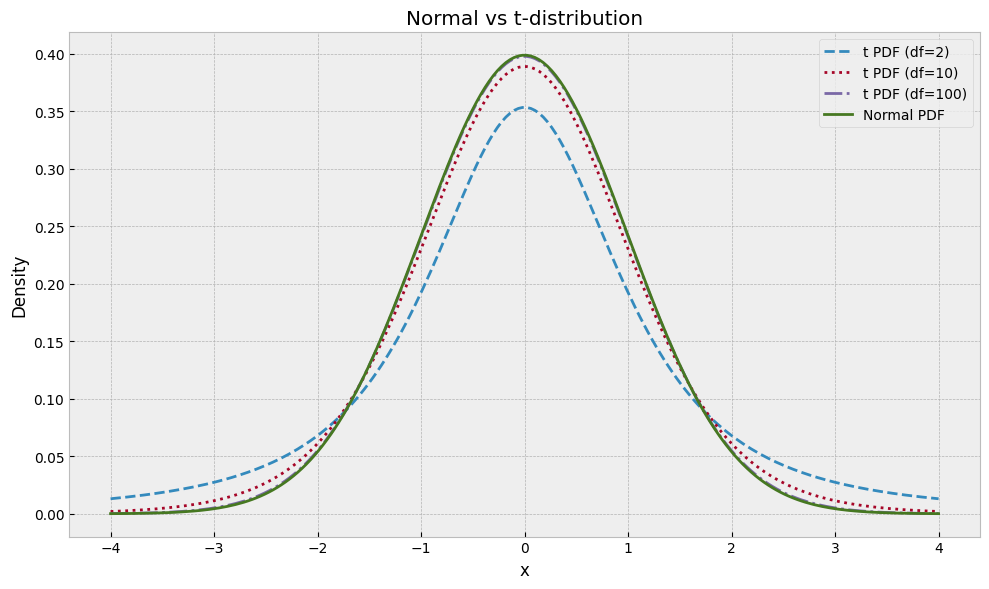

In [ ]:
from scipy.stats import t
plt.figure(figsize=(10, 6))

df = 2  # degrees of freedom for t-distribution
t_pdf_vals = t.pdf(x_vals, df)
plt.plot(x_vals, t_pdf_vals, label=f't PDF (df={df})', linestyle='--')
df = 10
t_pdf_vals = t.pdf(x_vals, df)
plt.plot(x_vals, t_pdf_vals, label=f't PDF (df={df})', linestyle=':')
df = 100
t_pdf_vals = t.pdf(x_vals, df)
plt.plot(x_vals, t_pdf_vals, label=f't PDF (df={df})', linestyle='-.')


plt.plot(x_vals, pdf_vals, label='Normal PDF')

plt.xlabel('x')
plt.ylabel('Density')
plt.title('Normal vs t-distribution')
plt.legend()
plt.tight_layout()
plt.show()

#### Confidence Intervals

The nice thing about the t-statistic is that we already have everything we need to calculate a confidence interval for the betas. We just need to know the standard error of the betas, which we can get from the t-statistic.

$$
CI(\hat{\beta}_j) = \hat{\beta}_j \pm t_{\alpha/2, \nu} \cdot SE(\hat{\beta}_j)
$$

In [34]:
# Print the confidence intervals for the betas
alpha = 0.05
t_critical = t.ppf(1 - alpha / 2, model.df_resid)
conf_int = model.conf_int(alpha=alpha)
print(f"Confidence intervals for betas at {100 * (1 - alpha)}% confidence level:")
for i, (lower, upper) in enumerate(conf_int):
    print(f"Beta {i}: [{lower:.4f}, {upper:.4f}]")

Confidence intervals for betas at 95.0% confidence level:
Beta 0: [-0.1573, 0.2245]
Beta 1: [-0.0848, 0.3044]


So we now can say that we are 95% confident that the true beta is within this interval. This is a very powerful tool, as it allows us to quantify our uncertainty about the betas. 

Also note that if the confidence interval does not include 0, then the beta is statistically significant!

#### Multiple Hypothesis Testing

To recap, we now have a way to:
1. Determine the overall significance of the model using the F-statistic.
2. Determine the significance of individual betas using the t-statistic.

Is it valid to just "read off" which p-values are signficant?

In [30]:
x = np.random.normal(loc=0, scale=1, size=(100, 20))
y = np.random.normal(loc=0, scale=1, size=100) + 0.2 * x[:, 0]

model = sm.OLS(y, sm.add_constant(x)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.028
Date:                Sun, 17 Aug 2025   Prob (F-statistic):              0.441
Time:                        16:22:34   Log-Likelihood:                -134.64
No. Observations:                 100   AIC:                             311.3
Df Residuals:                      79   BIC:                             366.0
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1161      0.113     -1.029      0.307      -0.341       0.109
x1             0.1915      0.114      1.684      0.096      -0.035       0.418
x2             0.1820      0.114      1.595      0.115      -0.045       0.409
x3             0.0412      0.112      0.366      0.715      -0.183       0.265
x4            -0.1882      0.126     -1.494      0.139      -0.439       0.063
x5             0.0578      0.103      0.562      0.576      -0.147       0.263
x6             0.0839      0.112      0.750      0.456      -0.139       0.307
x7             0.0153      0.116      0.132      0.895      -0.215       0.246
x8            -0.0795      0.107     -0.742      0.460      -0.293       0.134
x9            -0.0961      0.118     -0.816      0.417      -0.330       0.138
x10            0.0162      0.125      0.130      0.897      -0.232       0.264
x11           -0.0782      0.114     -0.684      0.496      -0.306       0.149
x12            0.0116      0.110      0.105      0.916      -0.207       0.230
x13            0.2407      0.115      2.089      0.040       0.011       0.470
x14           -0.0849      0.140     -0.606      0.546      -0.364       0.194
x15            0.0846      0.116      0.730      0.468      -0.146       0.315
x16            0.0464      0.114      0.408      0.685      -0.180       0.273
x17           -0.0032      0.106     -0.031      0.976      -0.214       0.208
x18            0.0312      0.129      0.241      0.810      -0.226       0.288
x19            0.1122      0.123      0.909      0.366      -0.134       0.358
x20            0.0898      0.103      0.871      0.386      -0.115       0.295
==============================================================================
Omnibus:                        0.316   Durbin-Watson:                   2.246
Prob(Omnibus):                  0.854   Jarque-Bera (JB):                0.489
Skew:                          -0.053   Prob(JB):                        0.783
Kurtosis:                       2.674   Cond. No.                         2.24
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

No! We need to be very careful about multiple hypothesis testing. In particular, if we use a p-value of 0.05, then that's saying we are willing to accept a 5% chance of a false positive for each hypothesis test (type 1 error). If we have 20 betas, then we have a $1 - (0.95)^{20} \approx 0.64$ chance of getting at least one false positive!

There are two main ways to deal with this:
1. Bonferroni correction: Divide the p-value by the number of tests (so if we have 20 tests, then we would use a p-value of 0.0025). This is conservative.
2. Benjamini-Hochberg (BH): This algorithm controls the false discovery rate (FDR) by ranking the p-values and comparing them to a threshold that decreases with the rank. This allows us to control the expected proportion of false discoveries among signficant results.

Note that this error also occurs when we're running a bunch of regressions on the same data set. So, if I regress 20 different features on the same target variable, then I need to be careful about the multiple hypothesis testing problem.

#### Some Issues with Inference

In [46]:
# --- 1. Define the "true" but tiny relationship ---
# True model: Y = 50 + 0.01*X + error
BETA_0 = 0.0 # True intercept
BETA_1 = 0.01  # True, but tiny, slope (the effect size)
ERROR_STD_DEV = 10.0

np.random.seed(101) 
small_n = 50

# Generate some X data
small_X = np.random.uniform(low=0, high=100, size=small_n)
# Generate the corresponding Y data based on our true model
small_Y = BETA_0 + BETA_1 * small_X + np.random.normal(0, ERROR_STD_DEV, small_n)

# Add a constant (for the intercept) and fit the OLS model
small_X_with_const = sm.add_constant(small_X)
small_model = sm.OLS(small_Y, small_X_with_const).fit()
print("--- Small Sample Regression (n=50) ---")
display(small_model.summary())

large_n = 500_000
large_X = np.random.uniform(low=0, high=100, size=large_n)
large_Y = BETA_0 + BETA_1 * large_X + np.random.normal(0, ERROR_STD_DEV, large_n)

# Add a constant and fit the OLS model
large_X_with_const = sm.add_constant(large_X)
large_model = sm.OLS(large_Y, large_X_with_const).fit()
print("--- Large Sample Regression (n=500,000) ---")
display(large_model.summary())

--- Small Sample Regression (n=50) ---


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     1.869
Date:                Sun, 17 Aug 2025   Prob (F-statistic):              0.178
Time:                        16:43:06   Log-Likelihood:                -186.09
No. Observations:                  50   AIC:                             376.2
Df Residuals:                      48   BIC:                             380.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.7575      2.957      1.947      0.057      -0.187      11.702
x1            -0.0683      0.050     -1.367      0.178      -0.169       0.032
==============================================================================
Omnibus:                        2.245   Durbin-Watson:                   2.594
Prob(Omnibus):                  0.325   Jarque-Bera (JB):                1.440
Skew:                           0.139   Prob(JB):                        0.487
Kurtosis:                       2.217   Cond. No.                         121.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

--- Large Sample Regression (n=500,000) ---


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     433.5
Date:                Sun, 17 Aug 2025   Prob (F-statistic):           3.16e-96
Time:                        16:43:06   Log-Likelihood:            -1.8608e+06
No. Observations:              500000   AIC:                         3.722e+06
Df Residuals:                  499998   BIC:                         3.722e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0102      0.028     -0.360      0.719      -0.066       0.045
x1             0.0102      0.000     20.820      0.000       0.009       0.011
==============================================================================
Omnibus:                        0.307   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.858   Jarque-Bera (JB):                0.307
Skew:                           0.002   Prob(JB):                        0.858
Kurtosis:                       2.999   Cond. No.                         115.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

So, even if we have a statistically significant model, that doesn't mean it's actually good. Why? Because with enough samples, we can make pretty much any model statistically significant.

What about this example?

In [ ]:
# Make x normal
x = np.random.normal(loc=0, scale=1, size=100_000)

# Make y = 2*x + noise
epsilon = np.random.normal(loc=0, scale=1, size=100_000)
y = 2 * x + epsilon

# Add 2 big outliers to y
y[-1] = 1000000
y[-2] = 1000000

model = sm.OLS(y, sm.add_constant(x)).fit()
display(model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.3146
Date:                Sun, 17 Aug 2025   Prob (F-statistic):              0.575
Time:                        16:50:42   Log-Likelihood:            -9.8245e+05
No. Observations:              100000   AIC:                         1.965e+06
Df Residuals:                   99998   BIC:                         1.965e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.9983     14.142      1.414      0.157      -7.720      47.717
x1             7.9330     14.143      0.561      0.575     -19.788      35.654
==============================================================================
Omnibus:                   504746.461   Durbin-Watson:                   0.500
Prob(Omnibus):                  0.000   Jarque-Bera (JB):   10415341434412.465
Skew:                         223.599   Prob(JB):                         0.00
Kurtosis:                   49997.819   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

So, it looks like the model above is not statistically significant. Let's look at the scatter plot:

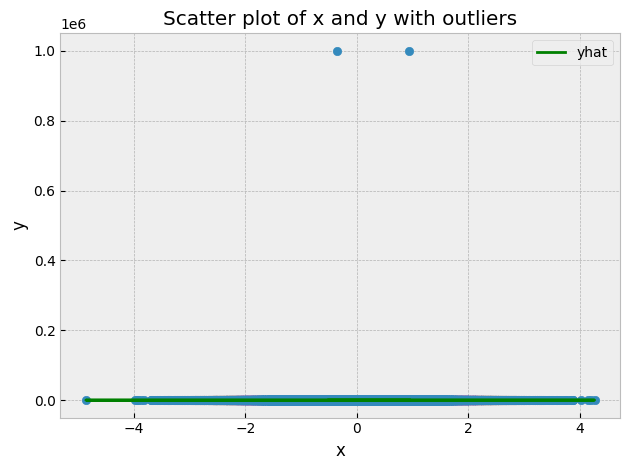

In [ ]:
plt.scatter(x, y, zorder=2)
plt.plot(x, model.predict(), color='green', lw=2, zorder=3, label='yhat')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of x and y with outliers')
plt.tight_layout()

plt.legend()
plt.show()

Okay, so even though the model is good (by construction I made $y = 2x + \epsilon$), the outliers are severly affecting the model.

We might also end up with a model that is misspecified, but still passes the regular significant tests.

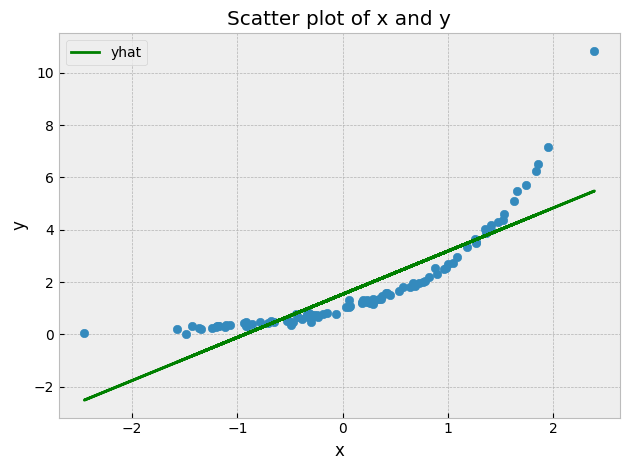

In [72]:
# Make y = e^x + noise
x = np.random.normal(loc=0, scale=1, size=100)
y = np.exp(x) + np.random.normal(loc=0, scale=0.1, size=100)

plt.scatter(x, y, zorder=2)
plt.plot(x, sm.OLS(y, sm.add_constant(x)).fit().predict(), color='green', lw=2, zorder=3, label='yhat')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of x and y')
plt.tight_layout()
plt.legend()
plt.show()

In [73]:
model = sm.OLS(y, sm.add_constant(x)).fit()
display(model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     300.1
Date:                Sun, 17 Aug 2025   Prob (F-statistic):           1.36e-31
Time:                        17:08:45   Log-Likelihood:                -131.90
No. Observations:                 100   AIC:                             267.8
Df Residuals:                      98   BIC:                             273.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5375      0.092     16.657      0.000       1.354       1.721
x1             1.6498      0.095     17.324      0.000       1.461       1.839
==============================================================================
Omnibus:                       81.973   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              629.904
Skew:                           2.661   Prob(JB):                    1.65e-137
Kurtosis:                      14.084   Cond. No.                         1.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

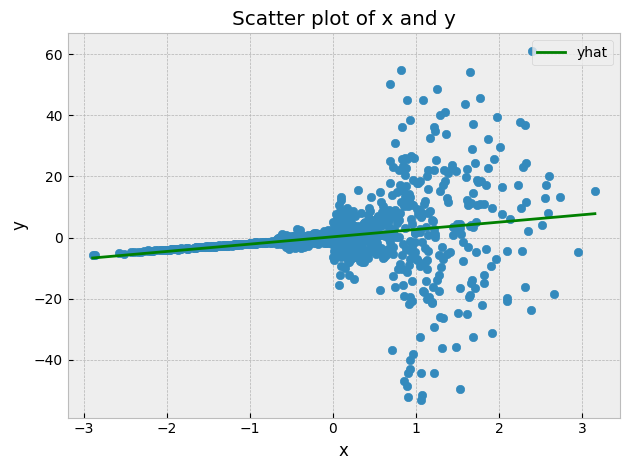

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     47.88
Date:                Sun, 17 Aug 2025   Prob (F-statistic):           8.10e-12
Time:                        17:11:58   Log-Likelihood:                -3818.0
No. Observations:                1000   AIC:                             7640.
Df Residuals:                     998   BIC:                             7650.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2392      0.349      0.686      0.493      -0.445       0.923
x1             2.3994      0.347      6.919      0.000       1.719       3.080
==============================================================================
Omnibus:                      192.380   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2856.895
Skew:                          -0.409   Prob(JB):                         0.00
Kurtosis:                      11.240   Cond. No.                         1.01
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Create x with 4 segments of different variances
n = 1000
x = np.random.normal(0, 1, n)
x = np.sort(x)  # Sort x to visualize the segments
# y = 2x + noise
epsilon = np.random.normal(0, 1, n)
y = 2 * x + np.concatenate([
    np.random.normal(0, 0.1, n // 4),
    np.random.normal(0, 1, n // 4),
    np.random.normal(0, 5, n // 4),
    np.random.normal(0, 20, n // 4)
])

model = sm.OLS(y, sm.add_constant(x)).fit()

plt.scatter(x, y, zorder=2)
plt.plot(x, model.predict(), color='green', lw=2, zorder=3
, label='yhat')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of x and y')
plt.tight_layout()
plt.legend()
plt.show()

display(model.summary())

Should I really be that confident about my betas?

#### Break for 5 Minutes

#### Diagnostics

All of these scatter plots look like they have issues. One has outliers, one has different variances, and one has a non-linear relationship.

Why can't I do inference on these models? Because in all of these cases, at least one of the assumptions of the linear regression model is violated.

Recall that to do *inference* on the model, we need to assume that:
1. The errors, $\epsilon$, are independent of the predicted values, $\hat{y}$.
2. The errors, $\epsilon$, are normally distributed *with constant variance* (no heteroskedasticity).

In case 2, we see that because the data is exponential, we underestimate the small and big $X$ values, and overestimate the middle $X$ values. This is a clear assumption of independence, since simply by telling me where I am in the $X$ space, I can tell you the sign of the error.

Fortunately, this is (typically?) pretty easy to deal with, we just need to linearize the data by being smart about our feature transforms. This is typically easy with quantitative inputs, but can be tricky with categorical inputs.

The first and third cases are harder to deal with. We have non-constant variance in the errors. I do want to emphasize that typically the law of large numbers is on our side, and because most things converge to normality, we can often get away with weird residuals. Additionally, this *only* affects inference, so if we're just interested in prediction, then we can often ignore this (ie. the ultimate financial metric is just P&L, not statistical significance).

How do we identify this? We can use the residuals of the model to check for independence and normality.

#### The QQ Plot

The QQ plot is a graphical tool to check if the residuals are normally distributed. It plots the quantiles of the residuals against the quantiles of a normal distribution. If the points fall along a straight line, then the residuals are normally distributed.

The first step is to normalize the residuals.

$$
z_i = \frac{r_i - \bar{r}}{\sigma_r}
$$

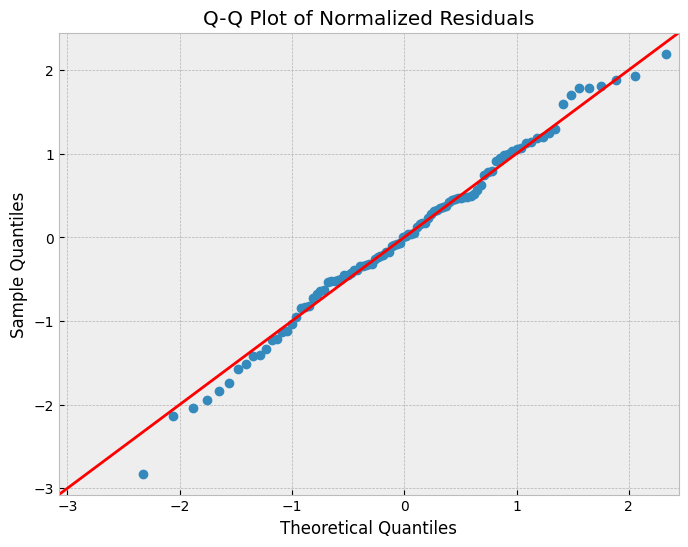

In [92]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

np.random.seed(42)
X = np.linspace(0, 100, 100)

error = np.random.normal(0, 10, 100)
y = 2 * X + error

# Fit the OLS model

X_with_const = sm.add_constant(X)
model = sm.OLS(y, X_with_const).fit()
residuals = model.resid
fitted_values = model.fittedvalues

normalized_residuals = (residuals - np.mean(residuals)) / np.std(residuals)
fig, ax = plt.subplots(figsize=(8, 6))
sm.qqplot(normalized_residuals, line='45', fit=True, ax=ax)
ax.set_title('Q-Q Plot of Normalized Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)
plt.show()



This looks good, but what about our non-constant variance case?

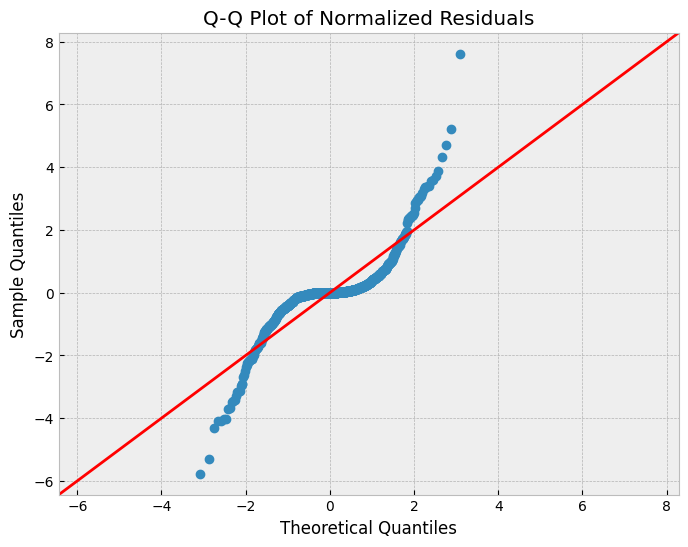

In [95]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats

# --- 1. Generate and Model Ideal Data ---

np.random.seed(42)
x = np.random.normal(0, 1, n)
x = np.sort(x)  # Sort x to visualize the segments
epsilon = np.random.normal(0, 1, n)
y = 2 * x + np.concatenate([
    np.random.normal(0, 0.1, n // 4),
    np.random.normal(0, 1, n // 4),
    np.random.normal(0, 5, n // 4),
    np.random.normal(0, 20, n // 4)
])

# Fit the OLS model

X_with_const = sm.add_constant(x)
model = sm.OLS(y, X_with_const).fit()
residuals = model.resid
fitted_values = model.fittedvalues

normalized_residuals = (residuals - np.mean(residuals)) / np.std(residuals)
fig, ax = plt.subplots(figsize=(8, 6))
sm.qqplot(normalized_residuals, line='45', fit=True, ax=ax)
ax.set_title('Q-Q Plot of Normalized Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)
plt.show()



Looks terrible! The residuals are clearly not normally distributed.

Another way to check for normality is to use the Shapiro-Wilk test.

$$
W = \frac{\left(\sum_{i=1}^{n} a_i x_{(i)}\right)^2}{\sum_{i=1}^{n} (x_i - \bar{x})^2}
$$

I'm giving the formula, but this is beyond the scope of this class. The important thing to know is that it gives us a p-value for the null hypothesis that the residuals are normally distributed. If the p-value is less than 0.05, then we reject the null hypothesis and conclude that the residuals are not normally distributed.

In [98]:
shapiro_stat, shapiro_p = stats.shapiro(residuals)
print("--- Normality Check (Shapiro-Wilk Test) ---")
print(f"Statistic: {shapiro_stat:.4f}, p-value: {shapiro_p:.4f}")

--- Normality Check (Shapiro-Wilk Test) ---
Statistic: 0.7524, p-value: 0.0000


The next step is to check for heteroskedasticity. Typically this will show up in a QQ plot, but, we can also just look at the residuals vs. the fitted values, or even just the raw data if you have 2D data.

Note that a lot of these techniques we don't necessarily need when working in low dimensions since we can easily visualize the data. However, in high dimensions we need to abstract away from the data and use statistical tests and plots to determine if the assumptions are violated.

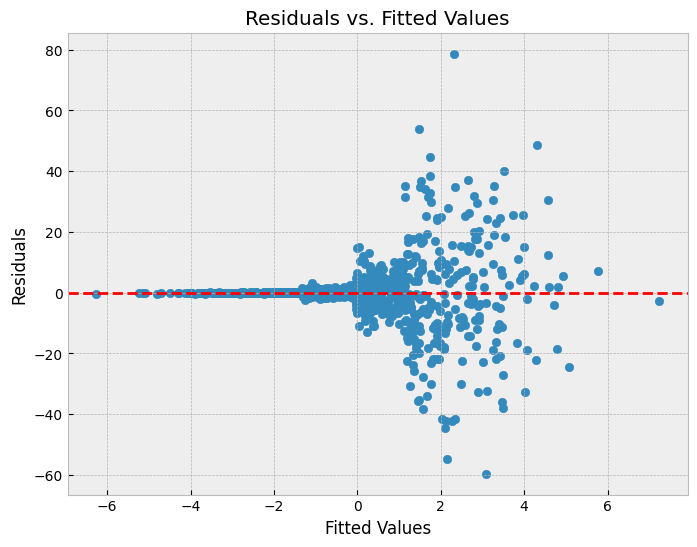

In [97]:
plt.figure(figsize=(8, 6))
plt.scatter(fitted_values, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

We've now established that our data is not normally distributed, and that the variance is not constant. What can we do about this?

Well, for the data that is not normally distributed, we unfortunately need to transform the data, or use the law of large numbers.

For non-constant variance, we are actually able to fix this easily and do inference on the model! There are two main ways to do this:
1. WLS (Weighted Least Squares)
2. GLS (Generalized Least Squares)
3. Heteroskedasticity-robust standard errors

For weighted least squares, if we notice that the variance is proportional to some function of $X$, then we can weight the observations by the inverse of that function. For example, if the variance is proportional to $X^2$, then we can weight the observations by $1/X^2$.

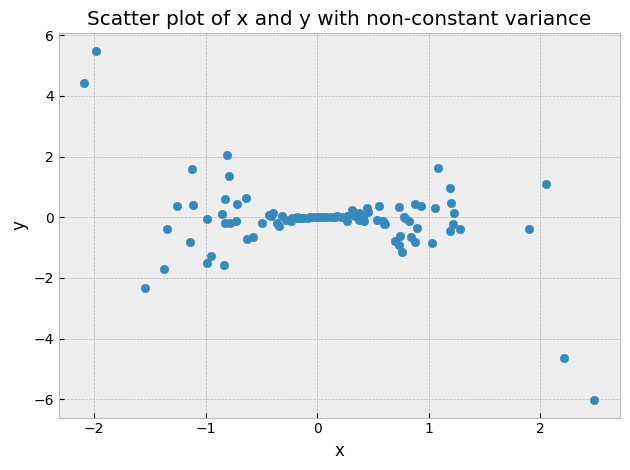

--- Raw Model Summary ---


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     15.67
Date:                Sun, 17 Aug 2025   Prob (F-statistic):           0.000143
Time:                        17:37:27   Log-Likelihood:                -153.19
No. Observations:                 100   AIC:                             310.4
Df Residuals:                      98   BIC:                             315.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0185      0.114     -0.162      0.871      -0.244       0.207
x1            -0.5225      0.132     -3.958      0.000      -0.785      -0.261
==============================================================================
Omnibus:                       24.084   Durbin-Watson:                   1.172
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.449
Skew:                          -0.386   Prob(JB):                     2.14e-33
Kurtosis:                       8.959   Cond. No.                         1.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

--- WLS Model Summary ---


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.003
Model:                            WLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.3297
Date:                Sun, 17 Aug 2025   Prob (F-statistic):              0.567
Time:                        17:37:27   Log-Likelihood:                -41.227
No. Observations:                 100   AIC:                             86.45
Df Residuals:                      98   BIC:                             91.67
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001      0.001      0.184      0.854      -0.001       0.001
x1            -0.0480      0.084     -0.574      0.567      -0.214       0.118
==============================================================================
Omnibus:                       10.132   Durbin-Watson:                   1.426
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               19.723
Skew:                           0.304   Prob(JB):                     5.21e-05
Kurtosis:                       5.089   Cond. No.                         148.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [102]:
x = np.random.normal(0, 1, 100)
sorted_x = np.sort(x)
y = 0.1 * sorted_x + np.random.normal(0, scale=sorted_x**2, size=100)

plt.scatter(sorted_x, y, zorder=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of x and y with non-constant variance')
plt.tight_layout()
plt.show()

# Do raw model
X_with_const = sm.add_constant(sorted_x)
model = sm.OLS(y, X_with_const).fit()
print("--- Raw Model Summary ---")
display(model.summary())

# Do WLS model
weights = 1 / sorted_x**2
model_wls = sm.WLS(y, X_with_const, weights=weights).fit()
print("--- WLS Model Summary ---")
display(model_wls.summary())

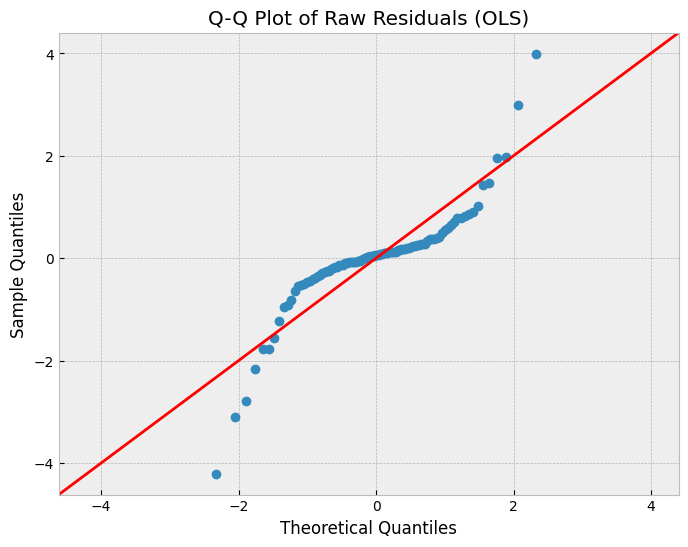

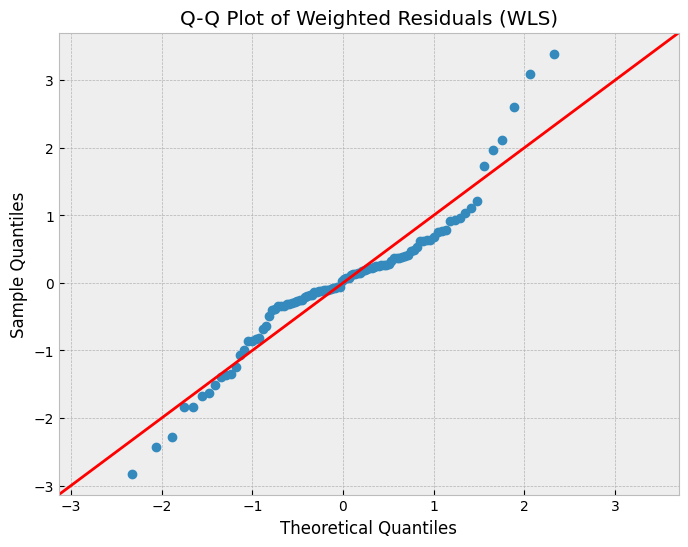

In [104]:
# Q-Q plot for raw residuals (from OLS)
fig, ax = plt.subplots(figsize=(8, 6))
sm.qqplot(model.resid, line='45', fit=True, ax=ax)
ax.set_title('Q-Q Plot of Raw Residuals (OLS)')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)
plt.show()


# Calculate weighted residuals from the WLS model
weighted_residuals = model_wls.resid * np.sqrt(weights)

# Normalize the weighted residuals
normalized_weighted_residuals = (weighted_residuals - np.mean(weighted_residuals)) / np.std(weighted_residuals)

fig, ax = plt.subplots(figsize=(8, 6))
sm.qqplot(normalized_weighted_residuals, line='45', fit=True, ax=ax)
ax.set_title('Q-Q Plot of Weighted Residuals (WLS)')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)
plt.show()

#### Generalized Least Squares (GLS)

Remember that the OLS model is defined as:
$$
y = \beta X + \epsilon
$$
$$
\epsilon \sim N(0, \sigma^2 I)
$$

So what GLS does is that instead of having $\sigma^2 I$, we have $\Sigma$, which is a covariance matrix that describes the variance of the residuals. The issue is that we need to *know* the covariance matrix of the residuals! But, if we have a good prior or function function that describes the variance (eg. proportional to $X^2$), then we can use that to estimate the covariance matrix.

In [105]:
# Do GLS model with 1/sorted_x**2 as variance prior
weights = 1 / sorted_x**2
model_gls = sm.GLS(y, X_with_const, sigma=weights).fit()
print("--- GLS Model Summary ---")
display(model_gls.summary())

--- GLS Model Summary ---


<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.400
Model:                            GLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     65.32
Date:                Sun, 17 Aug 2025   Prob (F-statistic):           1.70e-12
Time:                        17:43:23   Log-Likelihood:                -284.80
No. Observations:                 100   AIC:                             573.6
Df Residuals:                      98   BIC:                             578.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0372      0.222      0.167      0.867      -0.404       0.478
x1            -1.1625      0.144     -8.082      0.000      -1.448      -0.877
==============================================================================
Omnibus:                       26.020   Durbin-Watson:                   1.109
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.057
Skew:                          -0.415   Prob(JB):                     1.78e-40
Kurtosis:                       9.576   Cond. No.                         1.63
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Heteroskedasticity-Robust Standard Errors

This is typically the easiest way, since we don't need to change the model, we don't need to know the covariance matrix, and we don't need to think about weights. We can think of it as modifying the variance of $\beta$ to be:

$$
Var(\hat{\beta}) = (X^TX)^{-1} X^T \Sigma X (X^TX)^{-1}
$$

Instead of the usual:
$$
Var(\hat{\beta}) = \sigma^2 (X^TX)^{-1}
$$

So we assign a variance to each observation. The key thing is that we can just plug in the squared residuals as the variance, and then we can use the usual t-statistic to do inference on the betas.

There are three main ways to do this:
1. White's standard errors (just use the squared residuals as the variance)
2. HC1; correct for degrees of freedom
3. HC2; correct for leverage

So here, $\Sigma$ would look like:

White:
$$
\Sigma = \begin{bmatrix}
r_1^2 & 0 & \dots & 0 \\
0 & r_2^2 & \dots & 0 \\
\dots & \dots & \dots & \dots \\
0 & 0 & \dots & r_n^2
\end{bmatrix}
$$
Where $r_i = y_i - \hat{y}_i$ is the residual for observation $i$.

HC1:
$$
\Sigma = \frac{1}{n - p - 1} \begin{bmatrix}
r_1^2 & 0 & \dots & 0 \\
0 & r_2^2 & \dots & 0 \\
\dots & \dots & \dots & \dots \\
0 & 0 & \dots & r_n^2
\end{bmatrix}
$$

And HC3:

$$
\Sigma = \frac{1}{n - p - 1} \begin{bmatrix}
\frac{r_1^2}{(1 - h_1)^2} & 0 & \dots & 0 \\
0 & \frac{r_2^2}{(1 - h_2)^2} & \dots & 0 \\
\dots & \dots & \dots & \dots \\
0 & 0 & \dots & \frac{r_n^2}{(1 - h_n)^2}
\end{bmatrix}
$$

Where $h_i$ is the leverage of observation $i$.

In [106]:
model_hc0 = sm.OLS(y, X_with_const).fit(cov_type='HC0')
model_hc1 = sm.OLS(y, X_with_const).fit(cov_type='HC1')
model_hc3 = sm.OLS(y, X_with_const).fit(cov_type='HC3')

print("--- Heteroskedasticity-robust Standard Errors (HC0) ---")
display(model_hc0.summary())
print("--- Heteroskedasticity-robust Standard Errors (HC1) ---")
display(model_hc1.summary())
print("--- Heteroskedasticity-robust Standard Errors (HC3) ---")
display(model_hc3.summary())

--- Heteroskedasticity-robust Standard Errors (HC0) ---


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     3.538
Date:                Sun, 17 Aug 2025   Prob (F-statistic):             0.0629
Time:                        17:50:23   Log-Likelihood:                -153.19
No. Observations:                 100   AIC:                             310.4
Df Residuals:                      98   BIC:                             315.6
Df Model:                           1                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0185      0.116     -0.159      0.874      -0.246       0.209
x1            -0.5225      0.278     -1.881      0.060      -1.067       0.022
==============================================================================
Omnibus:                       24.084   Durbin-Watson:                   1.172
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.449
Skew:                          -0.386   Prob(JB):                     2.14e-33
Kurtosis:                       8.959   Cond. No.                         1.20
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

--- Heteroskedasticity-robust Standard Errors (HC1) ---


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     3.468
Date:                Sun, 17 Aug 2025   Prob (F-statistic):             0.0656
Time:                        17:50:23   Log-Likelihood:                -153.19
No. Observations:                 100   AIC:                             310.4
Df Residuals:                      98   BIC:                             315.6
Df Model:                           1                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0185      0.117     -0.158      0.875      -0.248       0.211
x1            -0.5225      0.281     -1.862      0.063      -1.073       0.027
==============================================================================
Omnibus:                       24.084   Durbin-Watson:                   1.172
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.449
Skew:                          -0.386   Prob(JB):                     2.14e-33
Kurtosis:                       8.959   Cond. No.                         1.20
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

--- Heteroskedasticity-robust Standard Errors (HC3) ---


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     3.063
Date:                Sun, 17 Aug 2025   Prob (F-statistic):             0.0832
Time:                        17:50:23   Log-Likelihood:                -153.19
No. Observations:                 100   AIC:                             310.4
Df Residuals:                      98   BIC:                             315.6
Df Model:                           1                                         
Covariance Type:                  HC3                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0185      0.123     -0.151      0.880      -0.259       0.222
x1            -0.5225      0.299     -1.750      0.080      -1.108       0.063
==============================================================================
Omnibus:                       24.084   Durbin-Watson:                   1.172
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.449
Skew:                          -0.386   Prob(JB):                     2.14e-33
Kurtosis:                       8.959   Cond. No.                         1.20
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

Okay, but what is leverage?!?

#### Outliers, Leverage, and Cooks Distance

Leverage we can think of "unusual" $X$ values. That is, an $x_i$ that is far away from the average $X$ will "pull" the regression line towards it as it's $y$ value changes.

The leverage of each point is the diagonal elements of the hat matrix, from review 1.

$$h_i = \frac{x_i^T (X^TX)^{-1} x_i}{\sum_{j=1}^{n} x_j^T (X^TX)^{-1} x_j}$$

Note that the leverage doesn't depend on the $y$ values, only on the $X$ values. So, we can have high leverage points that are not outliers, and low leverage points that are outliers.

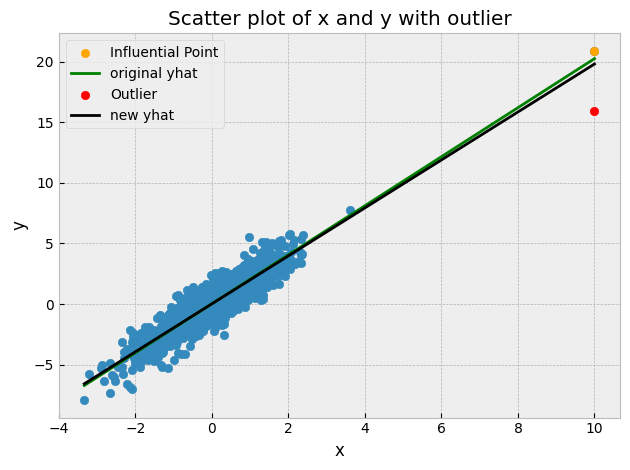

In [115]:
x = np.random.normal(0, 1, n - 1)
x = np.sort(x)  # Sort x to visualize the segments
x = np.concatenate([x, [10]])  
X_with_const = sm.add_constant(x)
y = 2 * x + np.random.normal(0, 1, n)

# Plot data and line of best fit
plt.scatter(x, y, zorder=2)
plt.scatter(x[-1], y[-1], c='orange', label='Influential Point', zorder=4)
plt.plot(x, sm.OLS(y, X_with_const).fit().predict(), color='green', lw=2, zorder=3, label='original yhat')

# Now shock the last y-value down by 5
y[-1] -= 5
plt.scatter(x[-1], y[-1], color='red', label='Outlier', zorder=4)
plt.plot(x, sm.OLS(y, X_with_const).fit().predict(), color='black', lw=2, zorder=3, label='new yhat')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of x and y with outlier')
plt.tight_layout()
plt.legend()
plt.show()

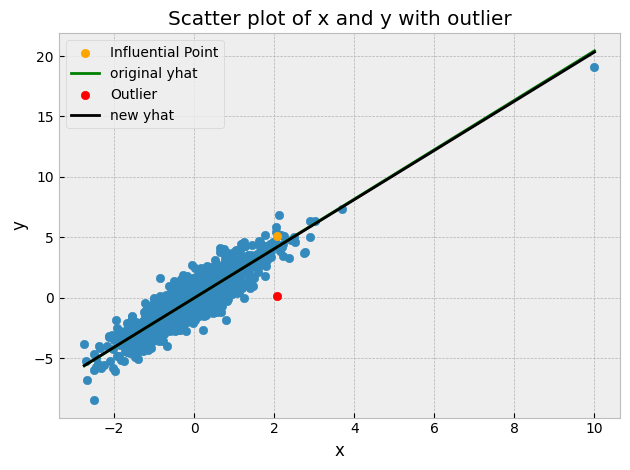

In [119]:
x = np.random.normal(0, 1, n - 1)
x = np.sort(x)  # Sort x to visualize the segments
x = np.concatenate([x, [10]])  
X_with_const = sm.add_constant(x)
y = 2 * x + np.random.normal(0, 1, n)

# Plot data and line of best fit
plt.scatter(x, y, zorder=2)
plt.scatter(x[-20], y[-20], c='orange', label='Influential Point', zorder=4)
plt.plot(x, sm.OLS(y, X_with_const).fit().predict(), color='green', lw=2, zorder=3, label='original yhat')

# Now shock the last y-value down by 5
y[-20] -= 5
plt.scatter(x[-20], y[-20], color='red', label='Outlier', zorder=4)
plt.plot(x, sm.OLS(y, X_with_const).fit().predict(), color='black', lw=2, zorder=3, label='new yhat')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of x and y with outlier')
plt.tight_layout()
plt.legend()
plt.show()

Leverage is a good measure of influence, but the whole point about outliers is that they are with regard to the $y$ values. So, we need a measure that combines both leverage and the residuals.

Cooks distance is a measure of the influence of an observation on the regression model. It is defined as:
$$D_i = \frac{r_i^2}{p \cdot MSE} \cdot \frac{h_i}{(1 - h_i)^2}$$

Where $r_i$ is the residual for observation $i$, $p$ is the number of parameters in the model, and $MSE$ is the mean squared error of the model. 

So what is this telling us? That if we have a high leverage point, and that point is also an outlier, then it will have a high Cook's distance. Cook's distance is a really good way to identify interesting points in the data when working in high dimensions.

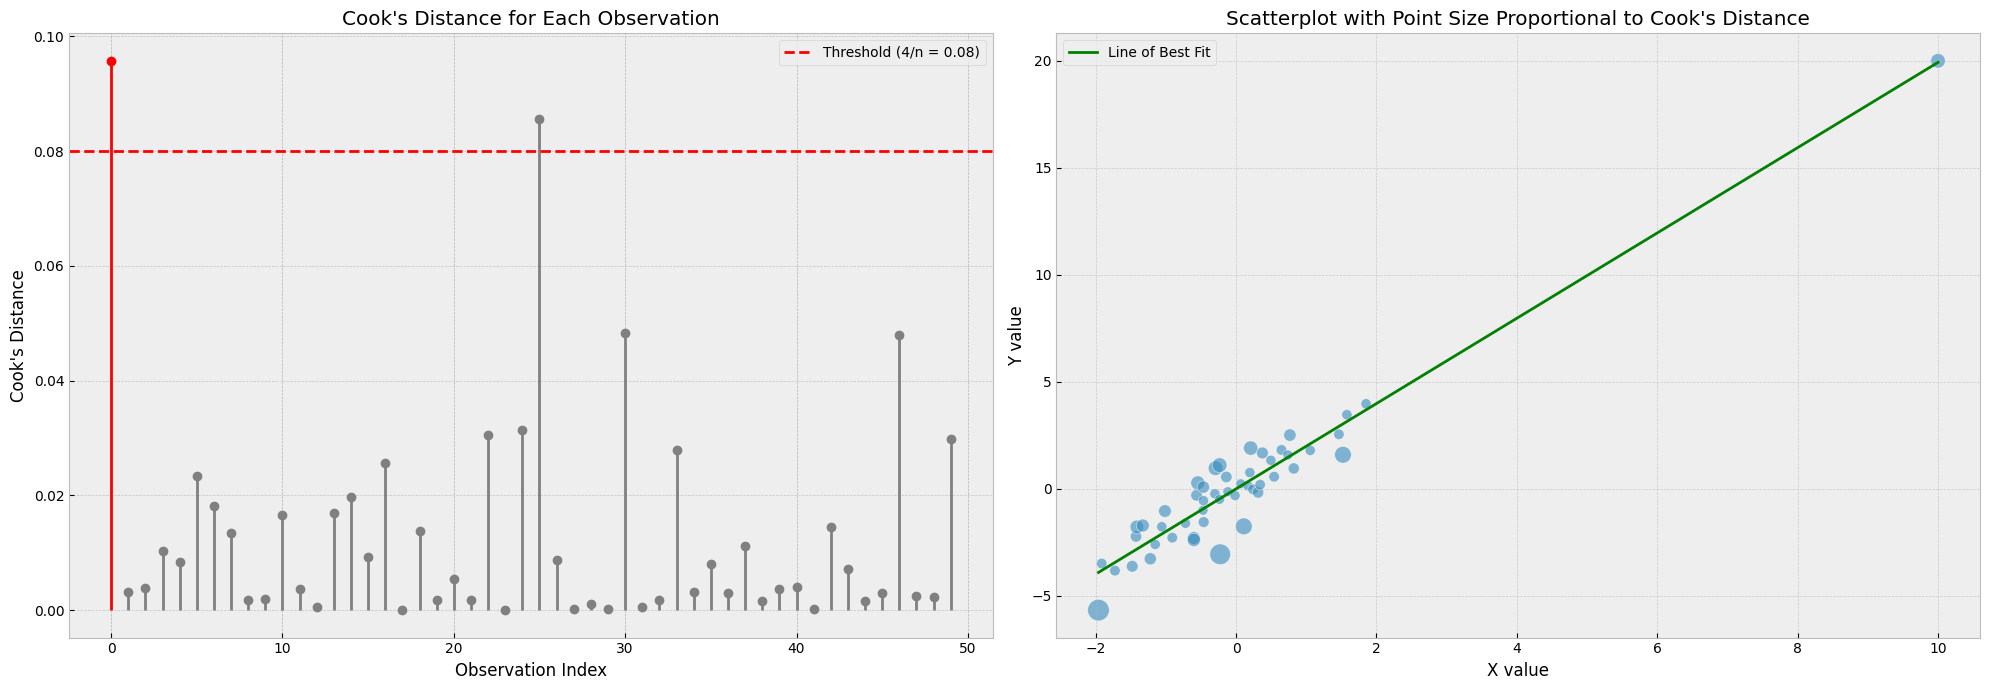

The maximum Cook's distance is: 0.0957
This occurs at index: 0


In [132]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# --- 1. Generate the data as specified ---
n = 50
np.random.seed(42) # for reproducibility

# Create n-1 points from a normal distribution
x = np.random.normal(0, 1, n - 1)
x = np.sort(x)  # Sort x to visualize the segments

# Add the high-leverage point at x=10
x = np.concatenate([x, [10]])  

# Create the y-values with some random noise
y = 2 * x + np.random.normal(0, 1, n)

# y[-1] -= 2  # Introduce an outlier by reducing the last y-value

# --- 2. Fit the OLS model ---
X_with_const = sm.add_constant(x)
model = sm.OLS(y, X_with_const).fit()

# --- 3. Calculate influence and Cook's distance ---
# Create an influence object
influence = model.get_influence()

# Get Cook's distance for each observation
cooks_d = influence.cooks_distance[0]
influential_idx = np.argmax(cooks_d)


# --- 4. Create a figure with two subplots ---
fig, axes = plt.subplots(1, 2, figsize=(20, 7))

# --- PLOT 1: Stem Plot of Cook's Distances ---
ax1 = axes[0]
all_indices = np.arange(n)
is_influential = all_indices == influential_idx

# Plot the non-influential points
ax1.stem(
    all_indices[~is_influential], 
    cooks_d[~is_influential],
    linefmt='grey', 
    markerfmt='o',
    basefmt=" "
)
# Plot the influential point separately in red
ax1.stem(
    all_indices[is_influential], 
    cooks_d[is_influential],
    linefmt='red', 
    markerfmt='ro',
    basefmt=" "
)
ax1.set_title("Cook's Distance for Each Observation")
ax1.set_xlabel("Observation Index")
ax1.set_ylabel("Cook's Distance")
ax1.grid(axis='y', linestyle='--', alpha=0.7)
threshold = 4/n
ax1.axhline(y=threshold, color='r', linestyle='--', label=f'Threshold (4/n = {threshold:.2f})')
ax1.legend()

# --- PLOT 2: Scatterplot with Point Size by Cook's Distance ---
ax2 = axes[1]
# Scale the Cook's distances for better visibility
# Add a minimum size so all points are visible
point_sizes = 50 + cooks_d * 2000 

# Plot the data points, sized by their influence
ax2.scatter(x, y, s=point_sizes, alpha=0.6, edgecolors='w', linewidth=0.5)

# Plot the line of best fit
ax2.plot(x, model.predict(), color='green', lw=2, zorder=3, label='Line of Best Fit')

ax2.set_title("Scatterplot with Point Size Proportional to Cook's Distance")
ax2.set_xlabel("X value")
ax2.set_ylabel("Y value")
ax2.grid(True, linestyle='--', alpha=0.6)
ax2.legend()

# --- 5. Display the plots ---
plt.tight_layout()
plt.show()

# Print the maximum Cook's distance to see its magnitude
print(f"The maximum Cook's distance is: {np.max(cooks_d):.4f}")
print(f"This occurs at index: {influential_idx}")

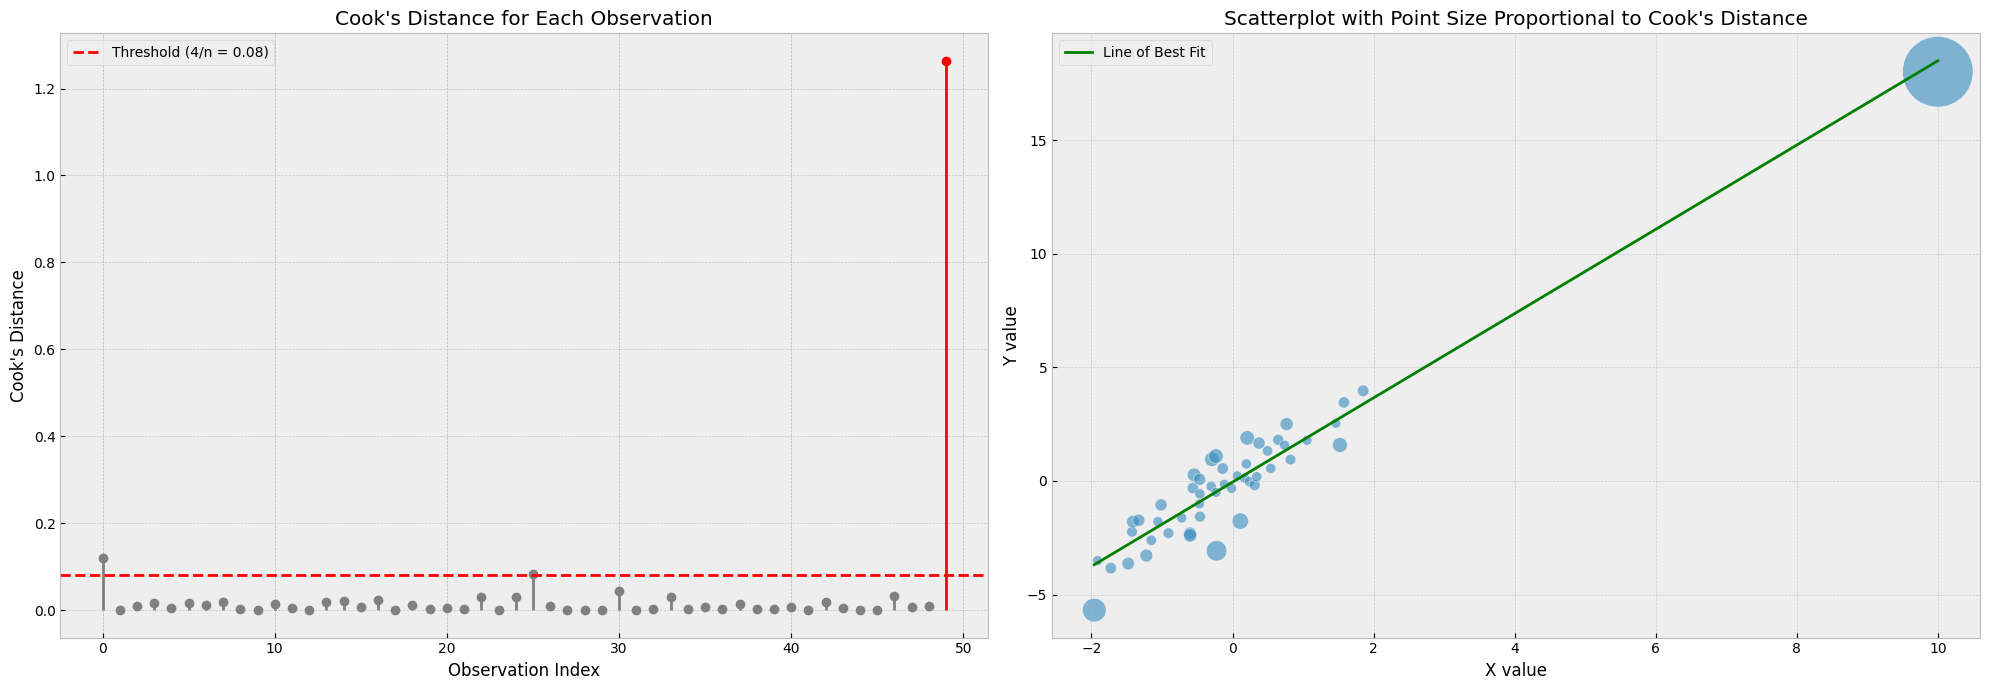

The maximum Cook's distance is: 1.2638
This occurs at index: 49


In [133]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# --- 1. Generate the data as specified ---
n = 50
np.random.seed(42) # for reproducibility

# Create n-1 points from a normal distribution
x = np.random.normal(0, 1, n - 1)
x = np.sort(x)  # Sort x to visualize the segments

# Add the high-leverage point at x=10
x = np.concatenate([x, [10]])  

# Create the y-values with some random noise
y = 2 * x + np.random.normal(0, 1, n)

y[-1] -= 2  # Introduce an outlier by reducing the last y-value

# --- 2. Fit the OLS model ---
X_with_const = sm.add_constant(x)
model = sm.OLS(y, X_with_const).fit()

# --- 3. Calculate influence and Cook's distance ---
# Create an influence object
influence = model.get_influence()

# Get Cook's distance for each observation
cooks_d = influence.cooks_distance[0]
influential_idx = np.argmax(cooks_d)


# --- 4. Create a figure with two subplots ---
fig, axes = plt.subplots(1, 2, figsize=(20, 7))

# --- PLOT 1: Stem Plot of Cook's Distances ---
ax1 = axes[0]
all_indices = np.arange(n)
is_influential = all_indices == influential_idx

# Plot the non-influential points
ax1.stem(
    all_indices[~is_influential], 
    cooks_d[~is_influential],
    linefmt='grey', 
    markerfmt='o',
    basefmt=" "
)
# Plot the influential point separately in red
ax1.stem(
    all_indices[is_influential], 
    cooks_d[is_influential],
    linefmt='red', 
    markerfmt='ro',
    basefmt=" "
)
ax1.set_title("Cook's Distance for Each Observation")
ax1.set_xlabel("Observation Index")
ax1.set_ylabel("Cook's Distance")
ax1.grid(axis='y', linestyle='--', alpha=0.7)
threshold = 4/n
ax1.axhline(y=threshold, color='r', linestyle='--', label=f'Threshold (4/n = {threshold:.2f})')
ax1.legend()

# --- PLOT 2: Scatterplot with Point Size by Cook's Distance ---
ax2 = axes[1]
# Scale the Cook's distances for better visibility
# Add a minimum size so all points are visible
point_sizes = 50 + cooks_d * 2000 

# Plot the data points, sized by their influence
ax2.scatter(x, y, s=point_sizes, alpha=0.6, edgecolors='w', linewidth=0.5)

# Plot the line of best fit
ax2.plot(x, model.predict(), color='green', lw=2, zorder=3, label='Line of Best Fit')

ax2.set_title("Scatterplot with Point Size Proportional to Cook's Distance")
ax2.set_xlabel("X value")
ax2.set_ylabel("Y value")
ax2.grid(True, linestyle='--', alpha=0.6)
ax2.legend()

# --- 5. Display the plots ---
plt.tight_layout()
plt.show()

# Print the maximum Cook's distance to see its magnitude
print(f"The maximum Cook's distance is: {np.max(cooks_d):.4f}")
print(f"This occurs at index: {influential_idx}")

#### Conclusion

To recap, we've talked about inference and diagnostics in linear regression.

The key takeaways are that the *key* of regression is to analyze the residuals, and once we have i.i.d residuals (or not!) we can do inference on the model. I'm going to run through some of the diagnostics plots that are generally good practice to look at.

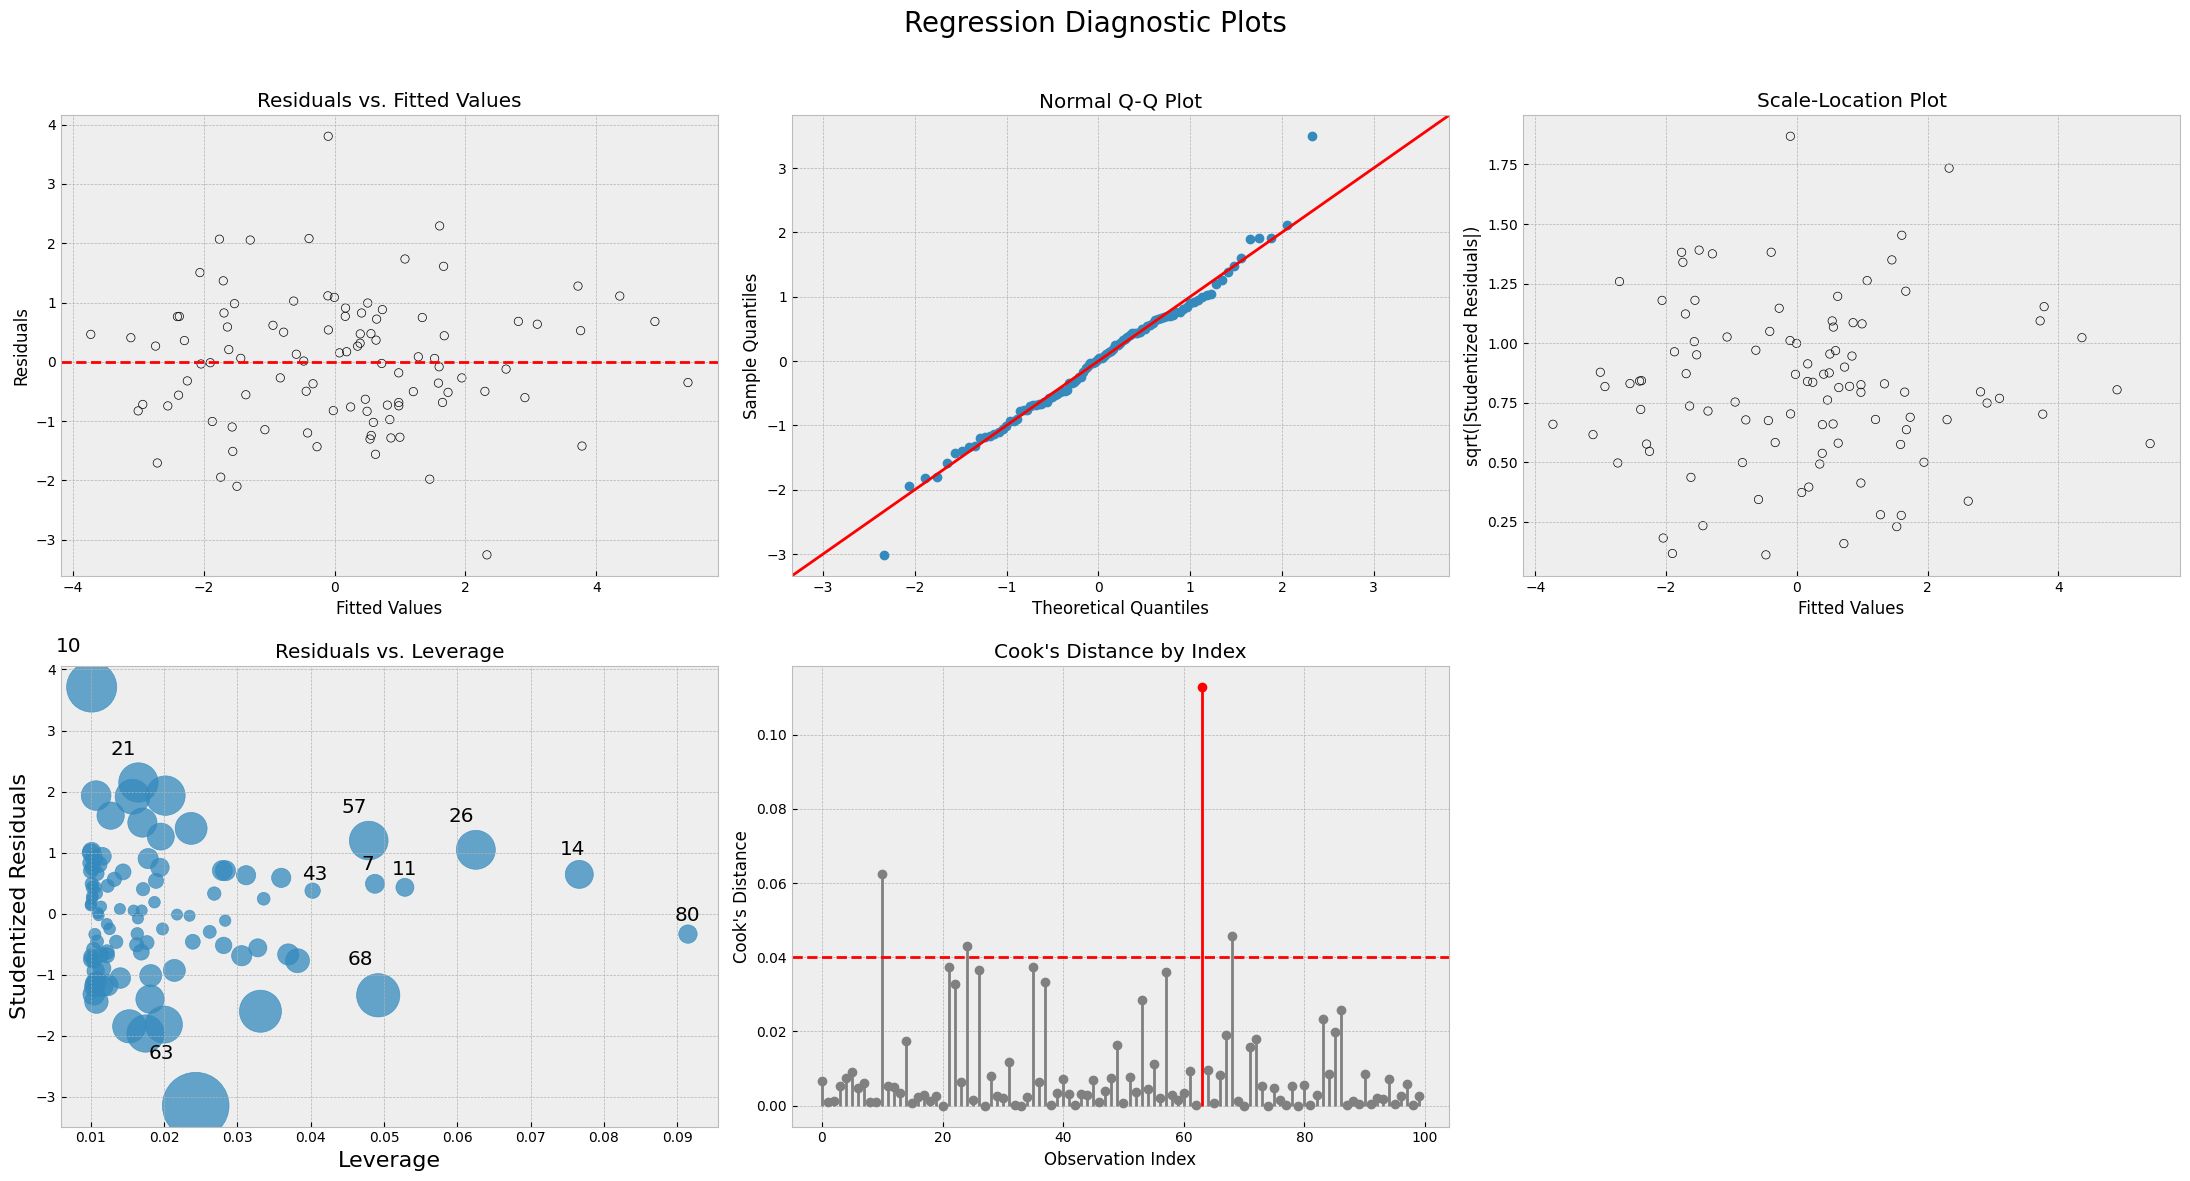

In [135]:
def plot_regression_diagnostics(model_results):
    """
    Generates a 2x3 grid of standard regression diagnostic plots.

    Args:
        model_results: A fitted statsmodels OLS object.
    """
    # --- 1. Get the necessary data from the model results ---
    fitted_vals = model_results.fittedvalues
    residuals = model_results.resid
    studentized_residuals = model_results.get_influence().resid_studentized_internal
    leverage = model_results.get_influence().hat_matrix_diag
    cooks_d = model_results.get_influence().cooks_distance[0]
    n = len(fitted_vals)

    # --- 2. Create the 2x3 plot grid ---
    fig, axes = plt.subplots(2, 3, figsize=(22, 12))
    fig.suptitle('Regression Diagnostic Plots', fontsize=20)
    plt.subplots_adjust(hspace=0.4, wspace=0.3)

    # --- Plot 1: Residuals vs. Fitted ---
    ax1 = axes[0, 0]
    ax1.scatter(fitted_vals, residuals, edgecolors='k', facecolors='none')
    ax1.axhline(y=0, color='r', linestyle='--')
    ax1.set_title('Residuals vs. Fitted Values')
    ax1.set_xlabel('Fitted Values')
    ax1.set_ylabel('Residuals')

    # --- Plot 2: Normal Q-Q Plot ---
    ax2 = axes[0, 1]
    sm.qqplot(studentized_residuals, line='45', fit=True, ax=ax2)
    ax2.set_title('Normal Q-Q Plot')

    # --- Plot 3: Scale-Location Plot ---
    ax3 = axes[0, 2]
    ax3.scatter(fitted_vals, np.sqrt(np.abs(studentized_residuals)), edgecolors='k', facecolors='none')
    ax3.set_title('Scale-Location Plot')
    ax3.set_xlabel('Fitted Values')
    ax3.set_ylabel('sqrt(|Studentized Residuals|)')

    # --- Plot 4: Residuals vs. Leverage ---
    ax4 = axes[1, 0]
    sm.graphics.influence_plot(model_results, ax=ax4, criterion="cooks")
    ax4.set_title('Residuals vs. Leverage')
    
    # --- Plot 5: Cook's Distance by Index ---
    ax5 = axes[1, 1]
    influential_idx = np.argmax(cooks_d)
    all_indices = np.arange(n)
    is_influential = all_indices == influential_idx
    
    # Plot non-influential points
    ax5.stem(all_indices[~is_influential], cooks_d[~is_influential], linefmt='grey', markerfmt='o', basefmt=" ")
    # Plot influential point in red
    ax5.stem(all_indices[is_influential], cooks_d[is_influential], linefmt='red', markerfmt='ro', basefmt=" ")
    
    ax5.set_title("Cook's Distance by Index")
    ax5.set_xlabel("Observation Index")
    ax5.set_ylabel("Cook's Distance")
    threshold = 4/n
    ax5.axhline(y=threshold, color='r', linestyle='--')

    # --- Plot 6: White out the empty subplot ---
    axes[1, 2].axis('off')

    plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust layout to make room for suptitle
    plt.show()
    
x = np.random.normal(0, 1, 100)
y = 2 * x + np.random.normal(0, 1, 100)
    
plot_regression_diagnostics(model_results=sm.OLS(y, sm.add_constant(x)).fit())

#### Gauss-Markov Theorem

Gauss-Markov theorem states that if we meet these 5 assumptions (seen across the two reviews):

1. Linearity: The relationship between the dependent and independent variables is linear.
2. Independence: The errors are independent of each other.
3. Homoscedasticity: The errors have constant variance.
4. Normality: The errors are normally distributed.
5. No Multicollinearity: The independent variables are not perfectly correlated.

Then, OLS is the Best Linear Unbiased Estimator (BLUE). 

1. Unbiased: $E[\hat{\beta}] = \beta$. So the expected value of the estimator is equal to the true value of the parameter (we aren't either too high or too low on average).
2. Linear: The estimator is a linear function of the dependent variable (we can write it as a linear combination of the $y$ values).
3. Best: The estimator has the lowest variance among all linear unbiased estimators (we are as close to the true value as possible, on average). That is, for any other linear unbiased estimator $\tilde{\beta}$, we have $Var(\hat{\beta}) \leq Var(\tilde{\beta})$.

What does estimator mean? An estimator how to calculate an estimate of a parameter based on the data. In this case, the OLS estimator tells us how to calculate the betas based on the $X$ and $y$ values.

#### Next Class

In the next class, we're going to talk about regularization and time series regression. We'll be covering:
1. Ridge and LASSO regression
2. Elastic Net
3. Robust regression
4. Time series (AR, etc.)
5. ARCH/GARCH